In [1]:
import os
os.chdir('C:\\Users\\Hammad\\Desktop\\Python')

In [2]:
import sklearn
print(sklearn.__version__)

0.21.3


In [3]:
os.getcwd()

'C:\\Users\\Hammad\\Desktop\\Python'

In [4]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv('Student.csv')

In [6]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
dataset.shape

(649, 33)

In [8]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
for column in dataset:
    unique_vals = py.unique(dataset[column])
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values  for feature {} : {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values  for feature {} : {}'.format(column, nr_values))

The number of values  for feature school : 2 -- ['GP' 'MS']
The number of values  for feature sex : 2 -- ['F' 'M']
The number of values  for feature age : 8 -- [15 16 17 18 19 20 21 22]
The number of values  for feature address : 2 -- ['R' 'U']
The number of values  for feature famsize : 2 -- ['GT3' 'LE3']
The number of values  for feature Pstatus : 2 -- ['A' 'T']
The number of values  for feature Medu : 5 -- [0 1 2 3 4]
The number of values  for feature Fedu : 5 -- [0 1 2 3 4]
The number of values  for feature Mjob : 5 -- ['at_home' 'health' 'other' 'services' 'teacher']
The number of values  for feature Fjob : 5 -- ['at_home' 'health' 'other' 'services' 'teacher']
The number of values  for feature reason : 4 -- ['course' 'home' 'other' 'reputation']
The number of values  for feature guardian : 3 -- ['father' 'mother' 'other']
The number of values  for feature traveltime : 4 -- [1 2 3 4]
The number of values  for feature studytime : 4 -- [1 2 3 4]
The number of values  for feature fai

In [10]:
dataset.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [11]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

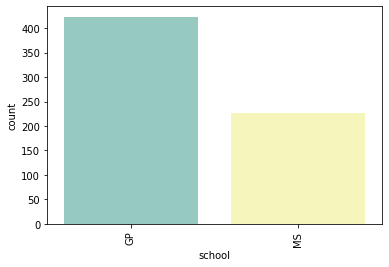

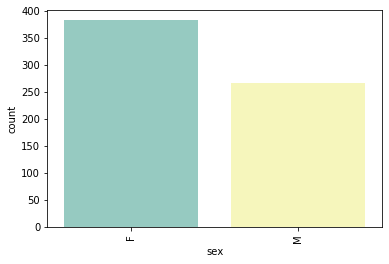

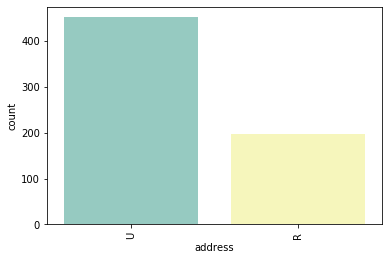

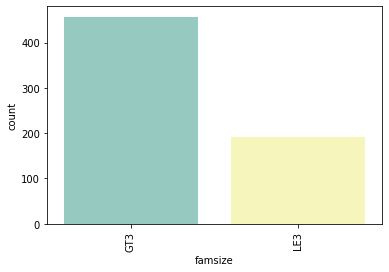

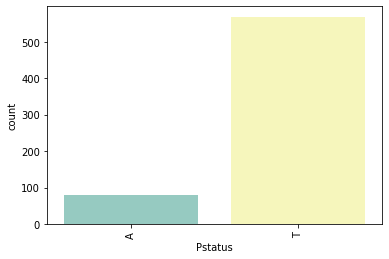

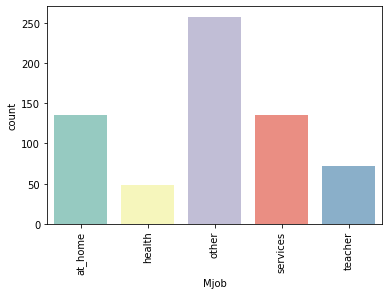

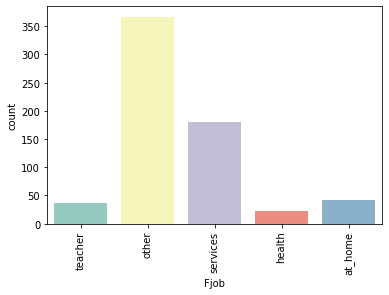

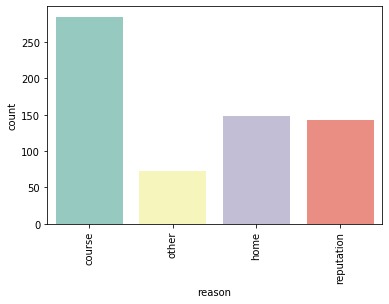

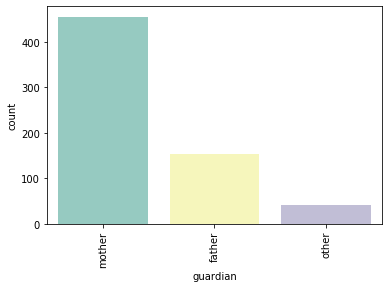

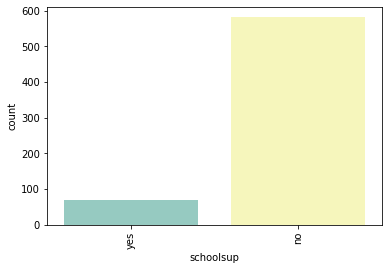

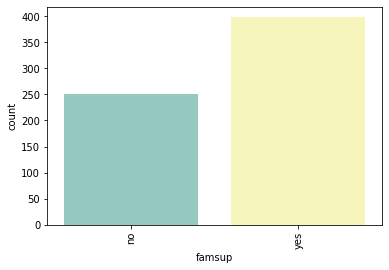

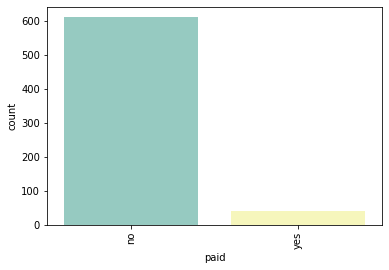

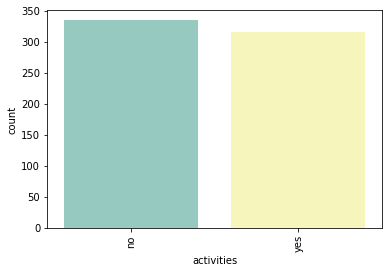

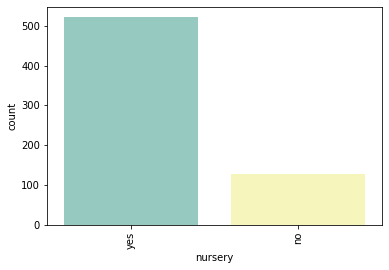

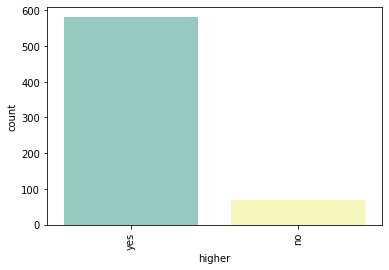

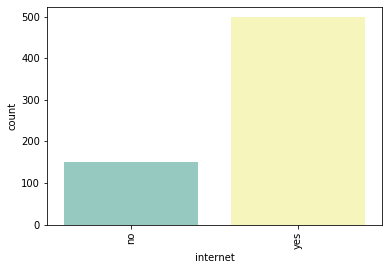

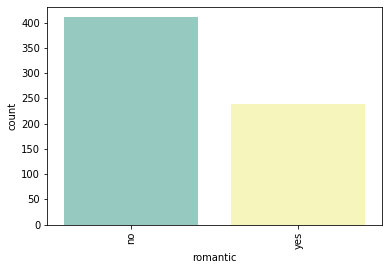

In [12]:
sel_features = ['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']


for f in sel_features:
    sns.countplot(x = f, data = dataset, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=90)
    plt.show()

In [13]:
# Making categorical variables into numeric representation

print(dataset.shape)

# keeping the columns we need 
raw_data = dataset[sel_features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = sel_features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data



(649, 33)
(649, 17)
(649, 43)


,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,1,0,1,0,0,1,...,0,1,1,0,0,1,0,1,1,0
645,0,1,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
646,0,1,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,1,0,1,0
647,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0


In [14]:
raw_data

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [15]:
result = pd.concat([dataset, new_raw_data], axis=1)
result

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,0,0,1,0,1,1,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,0,1,0,0,1,0,1,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,0,0,1,0,1,0,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,1,0,1,0,1,0,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,0,1,1,0,0,1,0,1,1,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,0,0,1,0,1,0,1,1,0
646,MS,F,18,U,GT3,T,1,1,other,other,...,0,1,0,1,0,1,1,0,1,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,1,0,1,0,0,1,0,1,1,0


In [16]:
result.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_

In [17]:
X = result.drop(['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'G3'], axis=1)
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,1,1,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,0,1,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0


In [18]:
X.shape

(649, 58)

In [19]:
X.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
famsize_GT3          uint8
famsize_LE3          uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
reason_home          uint8
r

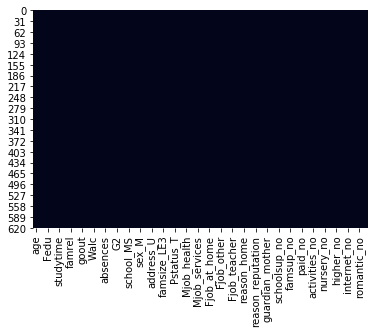

In [20]:
sns.heatmap(X.isnull(), cbar=False)

In [21]:
X.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
famsize_GT3          uint8
famsize_LE3          uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
reason_home          uint8
r

In [22]:
X=X.values

In [23]:
X

array([[18,  4,  4, ...,  0,  1,  0],
       [17,  1,  1, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  1,  0],
       ...,
       [18,  1,  1, ...,  0,  1,  0],
       [17,  3,  1, ...,  1,  1,  0],
       [18,  3,  2, ...,  1,  1,  0]], dtype=int64)

In [24]:
from sklearn.cluster import KMeans, k_means
no_of_clusters = range(2,20)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state = 2)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print("The insertia for :",f," Clusters is :",u)

The insertia for : 2  Clusters is : 28284.715818326506
The insertia for : 3  Clusters is : 22849.370607638826
The insertia for : 4  Clusters is : 20867.35110521636
The insertia for : 5  Clusters is : 19408.9332063346
The insertia for : 6  Clusters is : 18334.05788248182
The insertia for : 7  Clusters is : 17613.641192615338
The insertia for : 8  Clusters is : 16996.52646195698
The insertia for : 9  Clusters is : 16478.985901086682
The insertia for : 10  Clusters is : 16031.95177643867
The insertia for : 11  Clusters is : 15711.683349247338
The insertia for : 12  Clusters is : 15369.702853148316
The insertia for : 13  Clusters is : 15054.330465331605
The insertia for : 14  Clusters is : 14751.64666760086
The insertia for : 15  Clusters is : 14605.898646620217
The insertia for : 16  Clusters is : 14435.735802078643
The insertia for : 17  Clusters is : 14234.367662601935
The insertia for : 18  Clusters is : 14086.062560550461
The insertia for : 19  Clusters is : 13954.512706765188


Text(0.5, 1.0, 'Elbow Method')

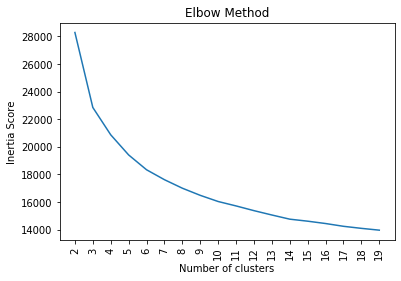

In [25]:
fig, (ax1) = plt.subplots(1)
xx = py.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation = 'vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('Elbow Method')


In [26]:
kmeans = KMeans(n_clusters=4,random_state=2)
kmeans = kmeans.fit(X)

kmeans.labels_

predictions = kmeans.predict(X)
unique, counts = py.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"])
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,126,250,32,241


In [27]:
kmeans.labels_

array([3, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 3, 0, 1, 1,
       1, 3, 3, 0, 0, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 0, 2, 0, 1, 3,
       2, 3, 0, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 2, 3, 3, 3, 1, 1, 3, 0, 1,
       0, 0, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 3, 1, 0, 1,
       1, 3, 0, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 1, 3, 0,
       0, 0, 1, 0, 3, 0, 3, 1, 3, 1, 3, 0, 0, 3, 3, 1, 3, 0, 2, 1, 3, 1,
       3, 2, 1, 3, 3, 0, 0, 2, 3, 3, 0, 1, 0, 1, 3, 2, 0, 3, 3, 3, 0, 3,
       3, 3, 3, 0, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 0, 3, 3, 1, 1, 2,
       0, 0, 3, 1, 0, 0, 0, 3, 2, 3, 1, 0, 1, 2, 2, 3, 1, 3, 1, 2, 0, 2,
       3, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 3, 0, 1, 0, 1, 3, 1, 3,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 2, 2, 2, 0, 1, 0, 3, 1, 2, 2,
       0, 1, 1, 0, 1, 0, 1, 3, 1, 0, 0, 0, 1, 3, 3, 0, 0, 3, 0, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 1,

Explained variance ratio (first two components): [0.38920618 0.2506908 ]


<Figure size 432x288 with 0 Axes>

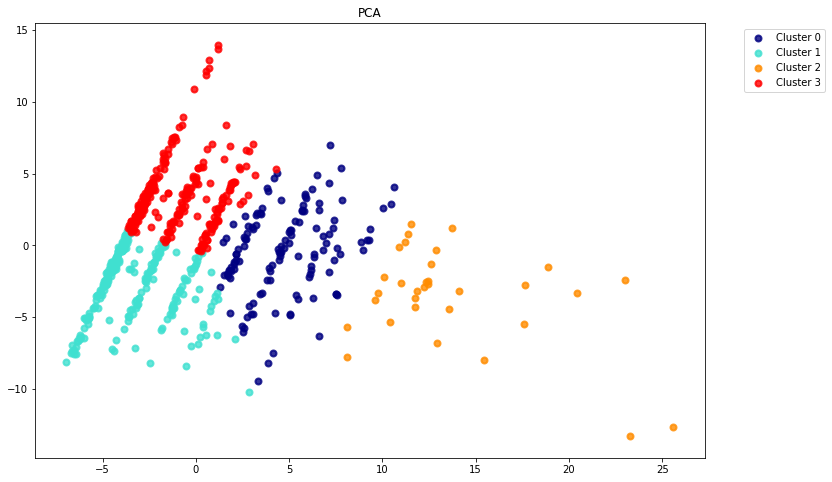

In [28]:
#Principle component analysis (PCA) to visualize and improve results
#PCA is a dimensionally reduction technique that transform a number of possibily correlated variable into a 
#small number of uncorrelated variables.

#The goal of PCA is to extract the most important information from the data table by compressing the size of the dataset
#and keeping only the important information

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"]
pca = PCA(n_components = 2, random_state = 40)
X_r = pca.fit(X).transform(X)

print('Explained variance ratio (first two components): %s' % str (pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
color = ['navy','turquoise', 'darkorange', 'red']
lw =2

for color, i, target_name in zip(color, [0,1,2,3], target_names):
    plt.scatter(X_r[y_num == i,0],X_r[y_num == i,1], color=color, alpha=.8,lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False,scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.6)
plt.title('PCA')
plt.show()


Total Variance in our dataset is:  58.22221271091326
The 95% variance we want to have is:  55.31110207536759

Variance explain with 10 n_compononets:  49.58924389118719
Variance explain with 20 n_compononets:  54.5274830490588
Variance explain with 30 n_compononets:  57.16138158877323
Variance explain with 31 n_compononets:  57.327665309816446
Variance explain with 35 n_compononets:  57.83731106019564
Variance explain with 40 n_compononets:  58.1889968741262
Variance explain with 45 n_compononets:  58.22221271091326
Variance explain with 50 n_compononets:  58.22221271091326


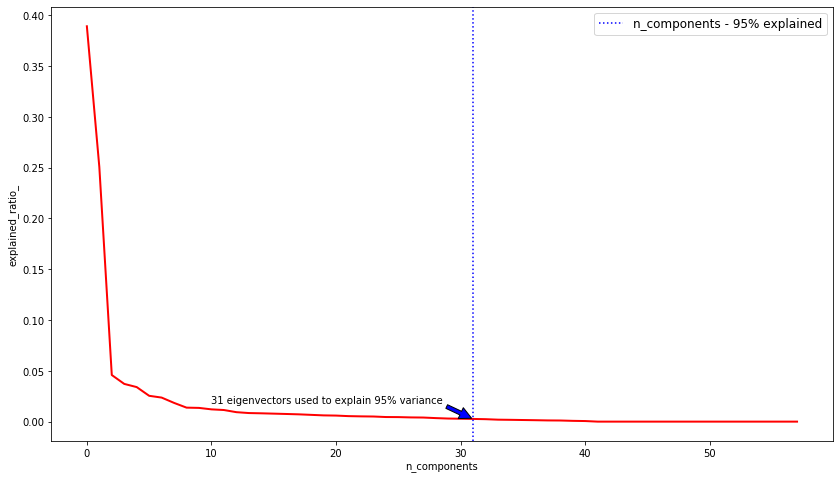

In [29]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 40)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 20 n_compononets: ", sum(a["Explained Variance"][0:20]))
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 31 n_compononets: ", sum(a["Explained Variance"][0:31]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 45 n_compononets: ", sum(a["Explained Variance"][0:45]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(31,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('31 eigenvectors used to explain 95% variance', xy=(31, pca.explained_variance_ratio_[31]), 
             xytext=(10, pca.explained_variance_ratio_[7]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()



The innertia for : 2 Clusters is: 16439.47864548914
The innertia for : 3 Clusters is: 11020.737662384337
The innertia for : 4 Clusters is: 9068.967944403968
The innertia for : 5 Clusters is: 7693.36287472579
The innertia for : 6 Clusters is: 6626.325443326495
The innertia for : 7 Clusters is: 5940.689934124337
The innertia for : 8 Clusters is: 5318.903464256828
The innertia for : 9 Clusters is: 4805.056461689307
The innertia for : 10 Clusters is: 4464.07862503694
The innertia for : 11 Clusters is: 4160.419121920259
The innertia for : 12 Clusters is: 3852.4372574490676
The innertia for : 13 Clusters is: 3627.3618967720895
The innertia for : 14 Clusters is: 3445.0703321499604
The innertia for : 15 Clusters is: 3312.6007635062924
The innertia for : 16 Clusters is: 3089.2660506255934
The innertia for : 17 Clusters is: 2952.34164736845
The innertia for : 18 Clusters is: 2833.342189097976
The innertia for : 19 Clusters is: 2715.7475225007483


Text(0.5, 1.0, 'Inertia Plot per k')

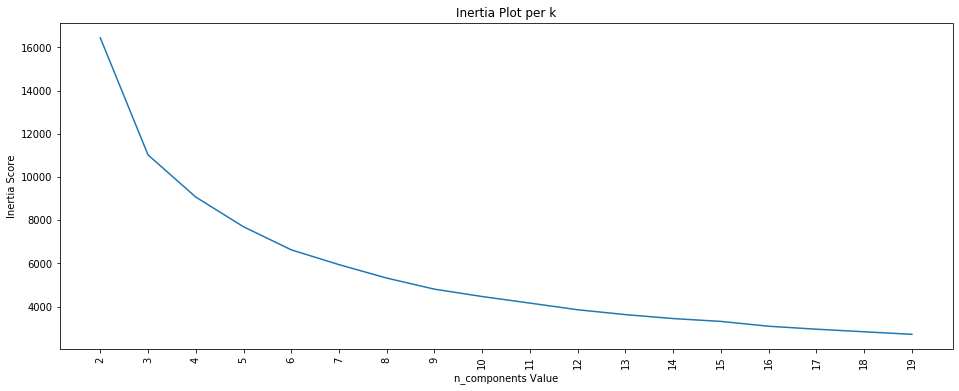

In [30]:
# Running PCA again

pca = PCA(n_components=3, random_state = 40)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = py.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(X)

In [32]:
X

array([[18,  4,  4, ...,  0,  1,  0],
       [17,  1,  1, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  1,  0],
       ...,
       [18,  1,  1, ...,  0,  1,  0],
       [17,  3,  1, ...,  1,  1,  0],
       [18,  3,  2, ...,  1,  1,  0]], dtype=int64)

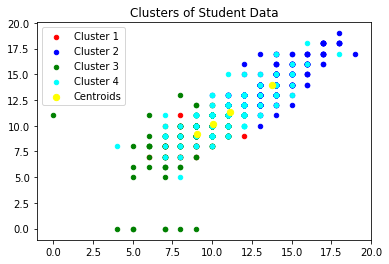

In [33]:
plt.scatter(X[y_kmeans == 0, 13], X[y_kmeans == 0, 14], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 13], X[y_kmeans == 1, 14], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 13], X[y_kmeans == 2, 14], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 13], X[y_kmeans == 3, 14], s = 20, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 13], kmeans.cluster_centers_[:, 14], s = 40, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Student Data')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.180530352180827

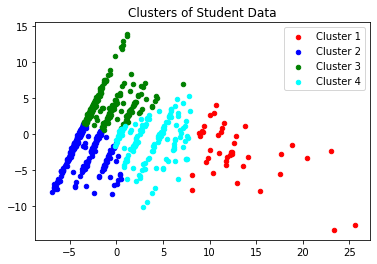

In [35]:
plt.scatter(X_r[y_kmeans == 0, 0], X_r[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X_r[y_kmeans == 1, 0], X_r[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X_r[y_kmeans == 2, 0], X_r[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X_r[y_kmeans == 3, 0], X_r[y_kmeans == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Student Data')
#plt.xlabel('MDVP:Fo(Hz)')
#plt.ylabel('MDVP:Fhi(Hz)')
plt.legend()
plt.show()

In [36]:
silhouette_score(X_r, kmeans.labels_)

0.3342056439336767

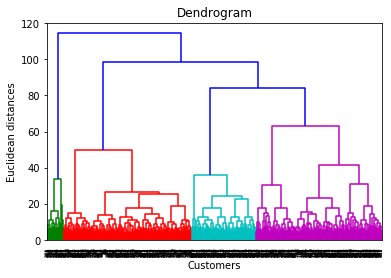

In [37]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [38]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

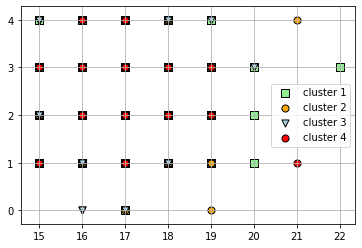

In [39]:
plt.scatter(
    X[y_hc == 0, 0], X[y_hc == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    X[y_hc == 1, 0], X[y_hc == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


plt.scatter(
    X[y_hc == 2, 0], X[y_hc == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


plt.scatter(
     X[y_hc == 3, 0],  X[y_hc == 3, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 4'
)

#plt.scatter(
#    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#    s=100, marker='*',
#    c='red', edgecolor='black',
#    label='centroids'
#)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


In [40]:
silhouette_score(X,y_hc)

0.1381122536149182

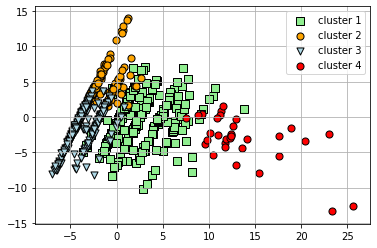

In [41]:
plt.scatter(
    X_r[y_hc == 0, 0],  X_r[y_hc == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
     X_r[y_hc == 1, 0],  X_r[y_hc == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


plt.scatter(
     X_r[y_hc == 2, 0],  X_r[y_hc == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


plt.scatter(
    X_r[y_hc == 3, 0],  X_r[y_hc == 3, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 4'
)


#plt.scatter(
#    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#    s=100, marker='*',
#    c='red', edgecolor='black',
#    label='centroids'
#)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [42]:
silhouette_score(X_r,y_hc)

0.24539939241003278

In [43]:
frame = pd.DataFrame(X)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

1    248
2    213
3    148
0     40
Name: cluster, dtype: int64

In [44]:
# Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create range of clusters 
cluster_ranges = list(range(2,11)); cluster_ranges

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [45]:
silhouette_score(X, kmeans.labels_)

0.180530352180827

For n_clusters = 2 The average silhouette_score is : 0.29993055329778534
For n_clusters = 3 The average silhouette_score is : 0.19475718305215883
For n_clusters = 4 The average silhouette_score is : 0.18188042230285878
For n_clusters = 5 The average silhouette_score is : 0.1336035393800728
For n_clusters = 6 The average silhouette_score is : 0.12648746625373125
For n_clusters = 7 The average silhouette_score is : 0.11134811203635578
For n_clusters = 8 The average silhouette_score is : 0.11233322699374211
For n_clusters = 9 The average silhouette_score is : 0.10297564538837559
For n_clusters = 10 The average silhouette_score is : 0.10224037255848042


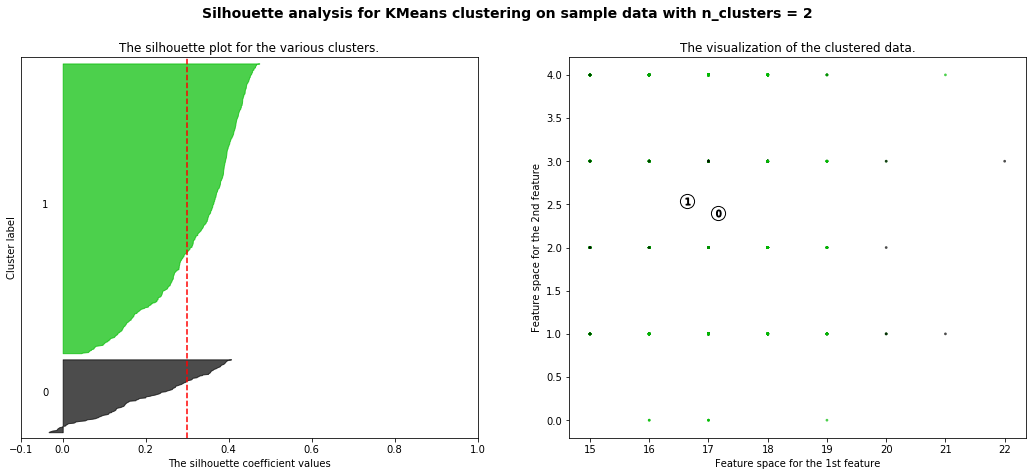

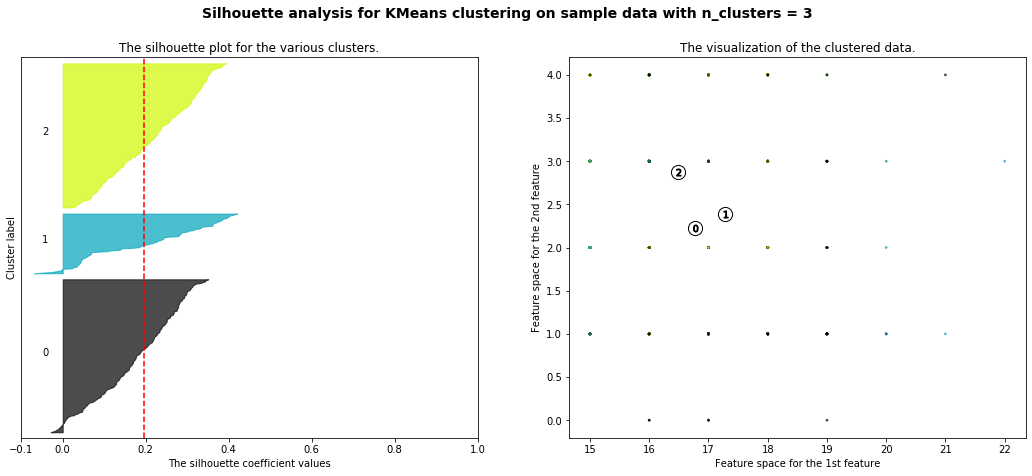

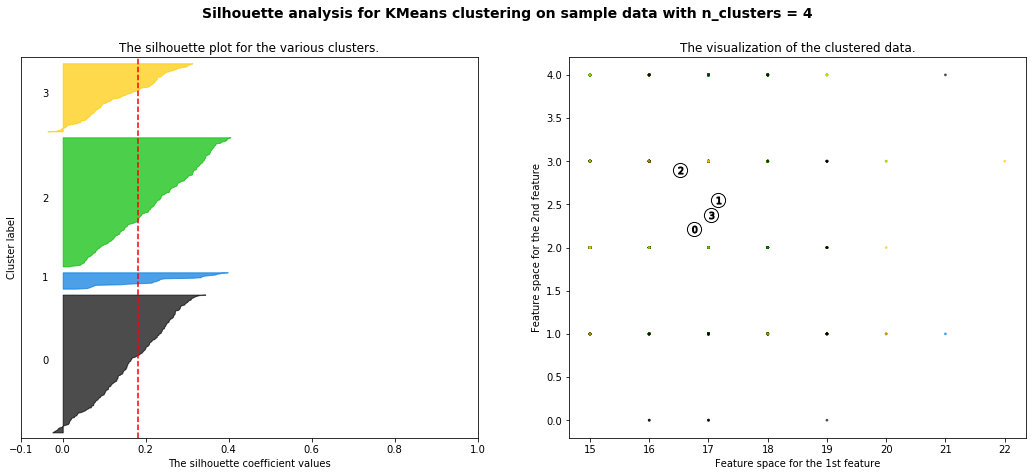

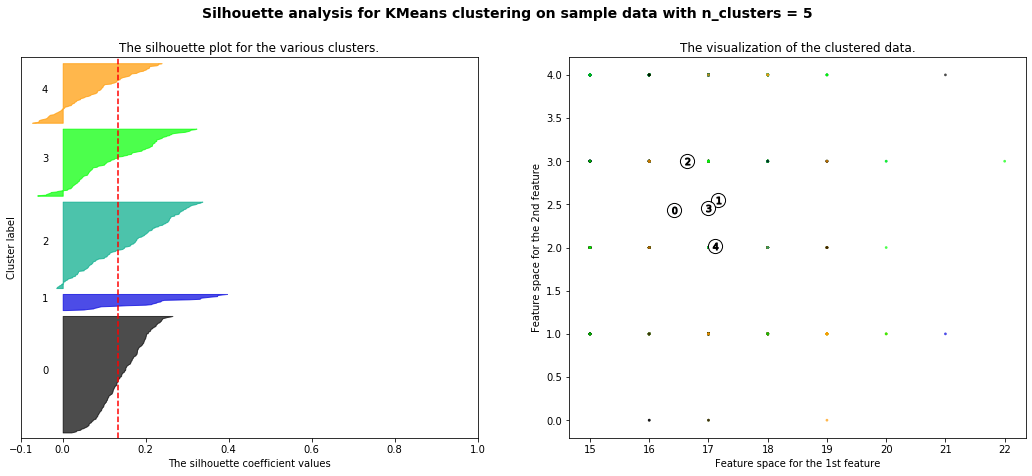

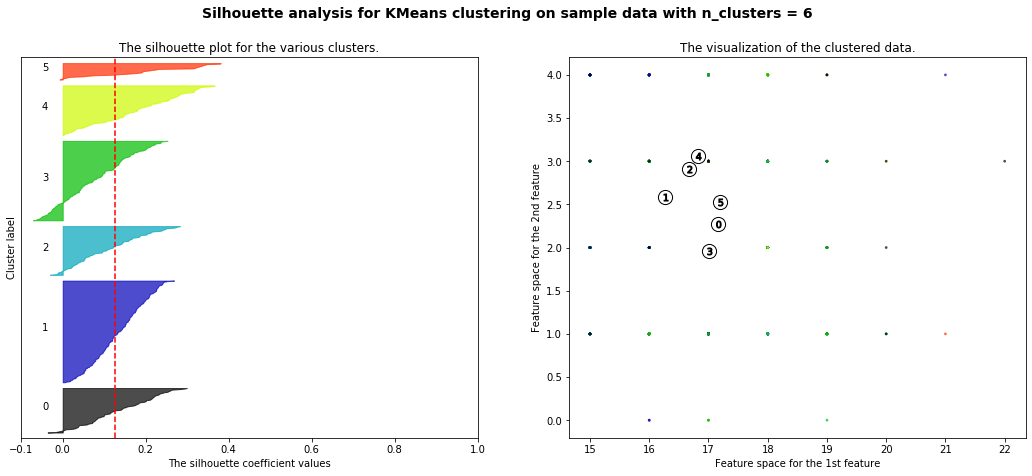

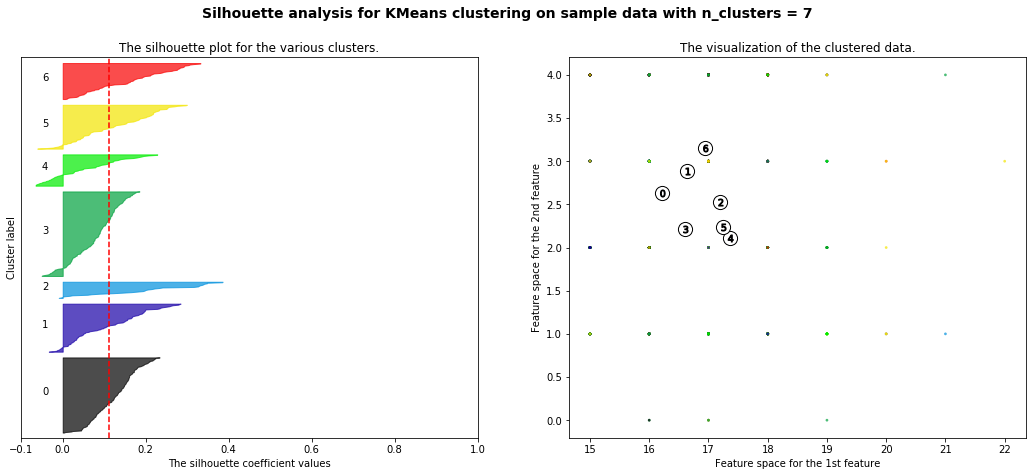

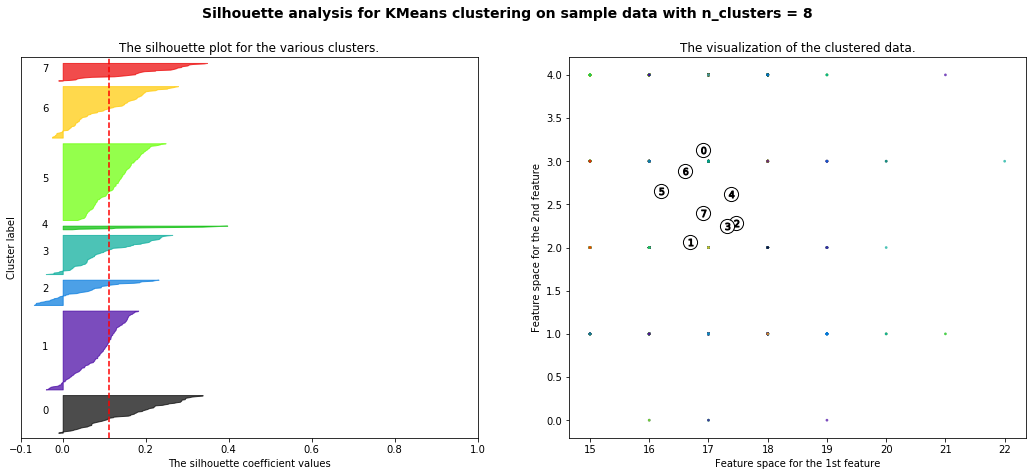

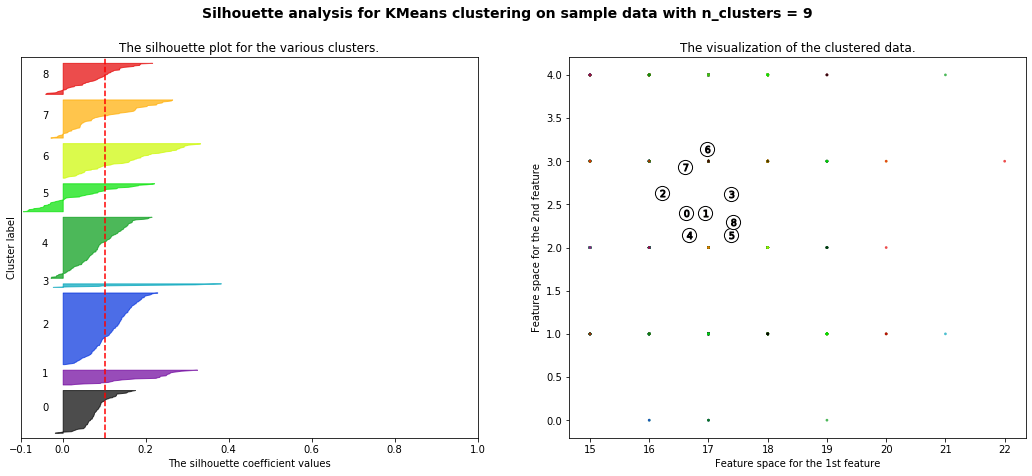

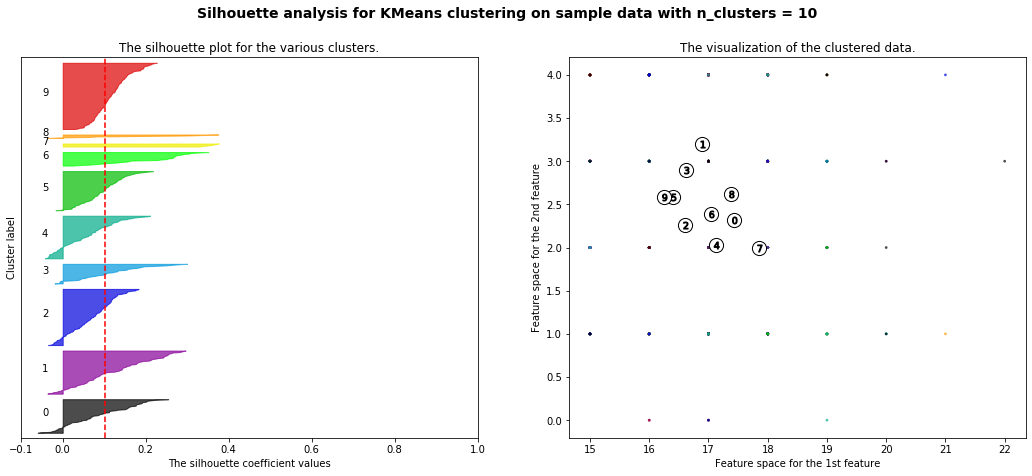

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in cluster_ranges:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(py.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [47]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
kmeans.inertia_

28284.715818326506

In [49]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(X)
pred = kmeans.predict(X)

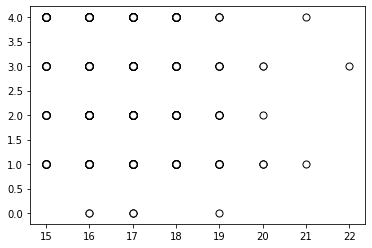

In [50]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

[-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0
  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0

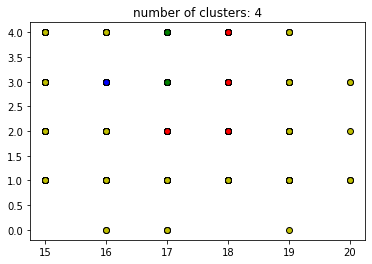

In [51]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

# Load data in X 
db = DBSCAN(eps=6, min_samples=2).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

print(labels) 

# Plot result 
import matplotlib.pyplot as plt 

# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
	if k == -1: 
		# Black used for noise. 
		col = 'k'

	class_member_mask = (labels == k) 

	xy = X[class_member_mask & core_samples_mask] 
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
									markeredgecolor='k', 
									markersize=6) 

	xy = X[class_member_mask & ~core_samples_mask] 
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
									markeredgecolor='k', 
									markersize=6) 

plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 


[-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0
  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0

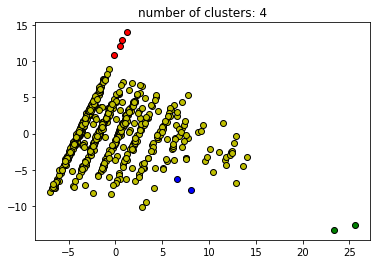

In [52]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

# Load data in X 
db = DBSCAN(eps=6, min_samples=2).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

print(labels) 

# Plot result 
import matplotlib.pyplot as plt 

# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
	if k == -1: 
		# Black used for noise. s
		col = 'k'

	class_member_mask = (labels == k) 

	xy = X_r[class_member_mask & core_samples_mask] 
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
									markeredgecolor='k', 
									markersize=6) 

	xy = X_r[class_member_mask & ~core_samples_mask] 
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
									markeredgecolor='k', 
									markersize=6) 

plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

In [53]:
silhouette_score(X,y_hc)

0.1381122536149182

In [54]:
silhouette_score(X_r,y_hc)

0.24539939241003278

In [55]:
silhouette_score(X, kmeans.labels_)

0.1323208311303974

In [56]:
silhouette_score(X_r, kmeans.labels_)

0.28269049365225507

In [57]:
silhouette_score(X, core_samples_mask)

0.32607175048686315

In [58]:
silhouette_score(X_r, core_samples_mask)

0.39278890375265346

In [62]:
import plotly.graph_objects as go

categories = ['Kmeanz', 'Hierarchical', 'Dbscan']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r= [0.1381122536149182, 0.1323208311303974, 0.32607175048686315],
      theta=categories,
      name='Silhouette_score without PCA'
))

fig.add_trace(go.Scatterpolar(
      r= [0.24539939241003278, 0.28269049365225507, 0.39278890375265346],
      theta=categories,
      name='Silhouette_score with PCA'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1, 1]
    )),
  showlegend=True
)

fig.show()